# Breast Cancer Prediction Using Neural Networks 

### Importing Required Libraries 

In [44]:
import  pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder

### Reading Csv File,Converting to Data Frame and Checking Info 

In [4]:
data=pd.read_csv(r'C:\Users\DAKSHIN\Desktop\PGP Analytics\Neural Network\BreastCancer.csv')

In [5]:
data=pd.DataFrame(data)

In [6]:
data=data.dropna()

In [7]:
data.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [8]:
data.shape

(683, 12)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       683 non-null    int64  
 1   Id               683 non-null    int64  
 2   Cl.thickness     683 non-null    int64  
 3   Cell.size        683 non-null    int64  
 4   Cell.shape       683 non-null    int64  
 5   Marg.adhesion    683 non-null    int64  
 6   Epith.c.size     683 non-null    int64  
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      683 non-null    int64  
 9   Normal.nucleoli  683 non-null    int64  
 10  Mitoses          683 non-null    int64  
 11  Class            683 non-null    int32  
dtypes: float64(1), int32(1), int64(10)
memory usage: 66.7 KB


In [46]:
le=LabelEncoder()
data['Class']=le.fit_transform(data['Class'])

### Splitting Data

In [47]:
x=data.iloc[:,2:10]
x.shape

(683, 8)

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     683 non-null    int64  
 1   Cell.size        683 non-null    int64  
 2   Cell.shape       683 non-null    int64  
 3   Marg.adhesion    683 non-null    int64  
 4   Epith.c.size     683 non-null    int64  
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      683 non-null    int64  
 7   Normal.nucleoli  683 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.0 KB


In [49]:
y=data.iloc[:,11]
y.shape

(683,)

In [50]:
y.dtype

dtype('int32')

### Train Test Split and Scaling using Standard Scaler

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()

In [54]:
scaler.fit(xtrain)

StandardScaler()

In [55]:
xtrain=scaler.transform(xtrain)

In [56]:
xtrain

array([[-1.23743303, -0.70972924, -0.7586351 , ..., -0.70703764,
        -0.60863012, -0.61735409],
       [-1.23743303, -0.70972924, -0.7586351 , ..., -0.70703764,
        -1.01385589, -0.61735409],
       [ 0.16659071, -0.38585993, -0.7586351 , ..., -0.70703764,
        -0.20340434, -0.61735409],
       ...,
       [ 1.92162037,  1.55735596,  1.24870946, ...,  1.74260855,
         1.41749875,  1.92915382],
       [ 0.51759664, -0.70972924, -0.7586351 , ..., -0.70703764,
        -0.60863012, -0.61735409],
       [-0.18441523,  0.58574802,  0.5795946 , ...,  1.74260855,
         2.63317608,  1.29252685]])

In [57]:
xtrain.shape

(512, 8)

In [58]:
xtest=scaler.transform(xtest)
xtest

array([[-0.18441523, -0.70972924, -0.7586351 , ..., -0.70703764,
        -0.20340434, -0.61735409],
       [-0.18441523, -0.70972924, -0.7586351 , ...,  0.381694  ,
        -0.60863012, -0.61735409],
       [ 1.92162037,  2.20509459,  2.25238173, ...,  1.74260855,
         0.20182143,  2.24746731],
       ...,
       [ 0.51759664,  2.20509459,  2.25238173, ...,  1.74260855,
         1.41749875,  0.01927289],
       [ 0.16659071,  0.58574802,  1.24870946, ...,  1.74260855,
         1.41749875,  0.33758638],
       [ 1.92162037,  2.20509459,  2.25238173, ...,  1.74260855,
         1.41749875,  2.24746731]])

In [59]:
xtest.shape

(171, 8)

### Neural Networks Architecture

In [60]:
from sklearn.neural_network import MLPClassifier

In [61]:
mlp=MLPClassifier(hidden_layer_sizes=(30,30,30))

In [62]:
mlp.fit(xtrain,ytrain)

C:\Users\DAKSHIN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 30, 30))

### Prediction

In [63]:
predictions=mlp.predict(xtest)


In [64]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

### Clssification Report, Confusion Matrix, Roc Curve

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(confusion_matrix(ytest,predictions))

[[114   5]
 [  3  49]]


In [70]:
ytest

66     0
222    1
286    1
623    0
584    0
      ..
349    1
346    0
253    1
295    1
302    1
Name: Class, Length: 171, dtype: int32

In [79]:
ytest

66     0
222    1
286    1
623    0
584    0
      ..
349    1
346    0
253    1
295    1
302    1
Name: Class, Length: 171, dtype: int32

In [90]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       119
           1       0.91      0.94      0.92        52

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [91]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [92]:
auc=metrics.roc_auc_score(ytest,predictions)

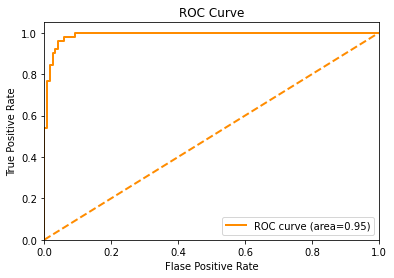

In [93]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' %auc)
plt.plot([0,1],[0,1],color='darkorange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

##### Classification Accuracy is 95% and Area Under Curve is 95% indicating 95% correctly predicted

In [94]:
predictions=le.inverse_transform(predictions)

In [100]:
predictions_df=pd.DataFrame(predictions,columns=['Benign or Malignant'])

In [101]:
predictions_df.head(10)

,Benign or Malignant
0,benign
1,benign
2,malignant
3,benign
4,benign
5,benign
6,benign
7,benign
8,benign
9,benign
